In [58]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random

In [59]:
filepath = '28850_pickle/np04hd_raw_run028850_0019_dataflow7_datawriter_0_20240822T124447_isolatedPDSHits.hdf5'
with h5py.File(filepath, 'r') as f:
    hits = np.array(f['hits'])

In [60]:
hits.dtype

dtype([('X', '<f4'), ('Y', '<f4'), ('Z', '<f4'), ('T', '<i8'), ('APA', '<i2'), ('channel', '<i4'), ('baseline', '<f4'), ('adcs', '<i4', (1024,)), ('record_number', '<i4')])

In [61]:
records = np.unique(hits['record_number'])

In [74]:
index = 1
hits_sel = hits[hits['record_number'] == records[index]]

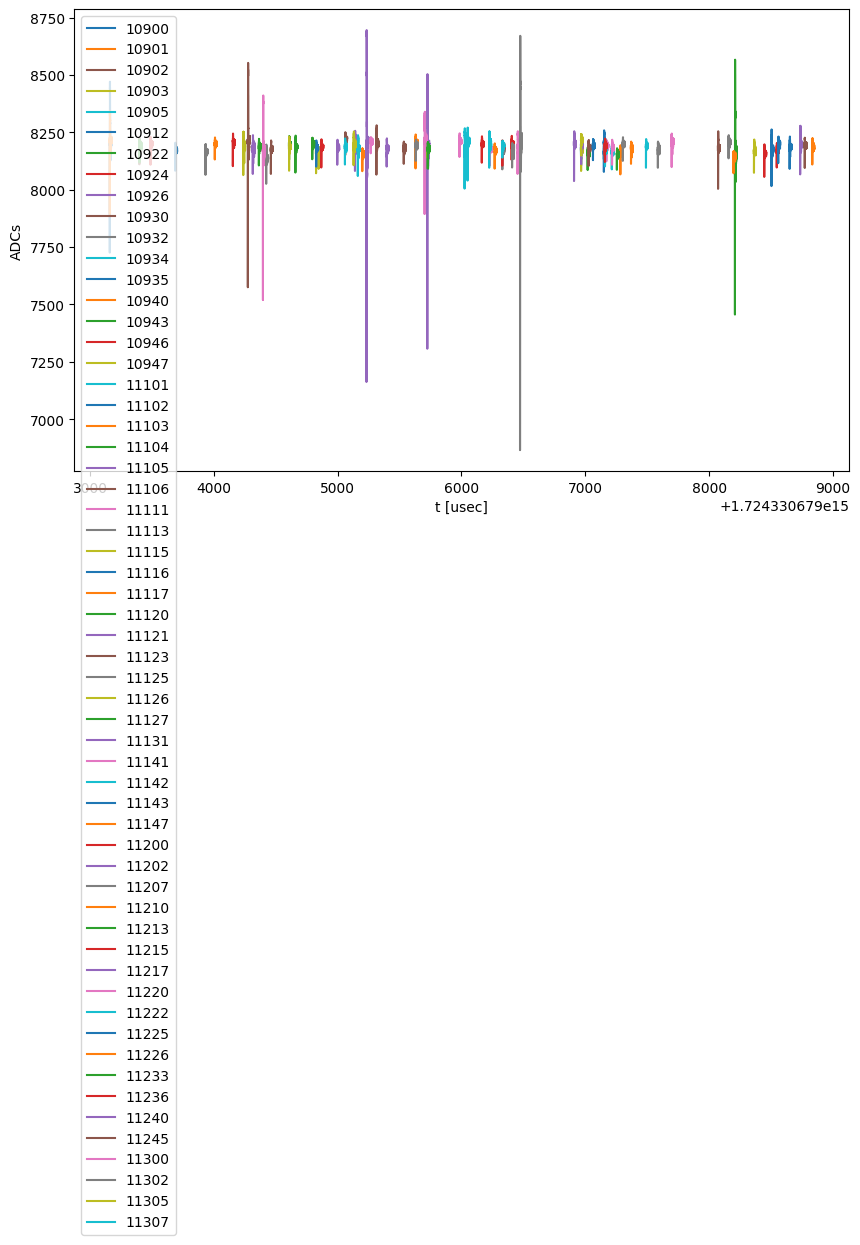

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
samples = hits_sel[0]['adcs'].shape[0]
rel_samples = np.arange(0, samples)*16*1e-3
use_label = True
for channel in np.unique(hits_sel['channel']):
    color = (random.random(), random.random(), random.random())
    hits_sel_channel = hits_sel[hits_sel['channel'] == channel]
    for hit in hits_sel_channel:
        if use_label:
            label=str(channel)
        else:
            label=None
        axes.plot(rel_samples+hit['T'], hit['adcs'], label=label)
        use_label = False
    use_label = True
axes.set_xlabel('t [usec]')
axes.set_ylabel('ADCs')
axes.legend()
#axes.set_xlim(3000, 6000)

In [21]:
samples = hits_sel[0]['adcs'].shape[0]
samples

1024

In [22]:
np.arange(0, samples)

array([   0,    1,    2, ..., 1021, 1022, 1023])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,  25.,  31.,
         22.,  59., 338., 376., 268., 237., 158., 141.,  99.,  74.,  69.,
         42.,  54.,  32.,  32.,  30.,  19.,  24.,  16.,  23.,  11.,  14.,
         11.,   8.,  15.,   7.,  14.,   8.,   9.,  12.,   4.,   3.,   6.,
          5.,   8.,   6.,   4.,   9.,   7.,   6.,   4.,   5.,   5.,   3.,
          3.,  10.,   8.,   4.,   3.,   3.,   4.,   2.,   7.,   2.,   3.,
          5.,   2.,   2.,   2.,   3.,   4.,   4.,   1.,   3.,   3.,   2.,
          3.,   1.,   6.,   1.,   0.,   1.,   2.,   0.,   5.,   3.,   2.,
          1.,   1.,   2.,   2.,   3.,   0.,   4.,   2.,   1.,   2.,   3.,
          3.,   1.,   2.,   3.,   4.,   0.,   5.,   3.,   0.,   1.,   1.,
          1.,   0.,   2.,   2.,   1.,   2.,   1.,   2.,   3.,   0.,   0.,
          1.,   3.,   0.,   2.,   1.,   0.,   4.,   4.,   3.,   0.,   1.,
          4.,   2.,   3.,   1.,   3.,   2.,   2.,   0.,   1.,   5.,   1.,
          1.,   1.,   0.,   0.,   2., 

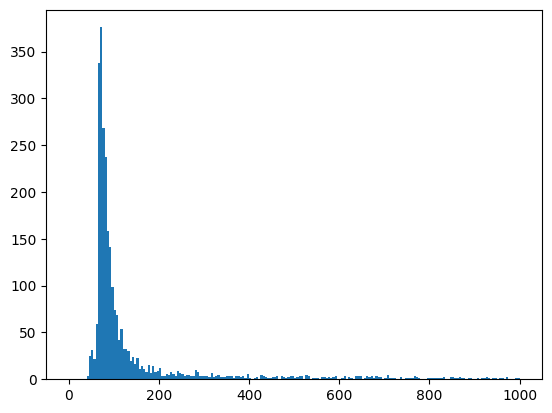

In [70]:
peaks = np.abs(np.min(hits['adcs'], axis=1) - hits['baseline'])
plt.hist(peaks, bins=200, range=(0, 1000))

In [33]:
np.max(hits[0:5]['adcs'][1])

8283

In [ ]:
np.mean(hits[0:5]['adcs'])

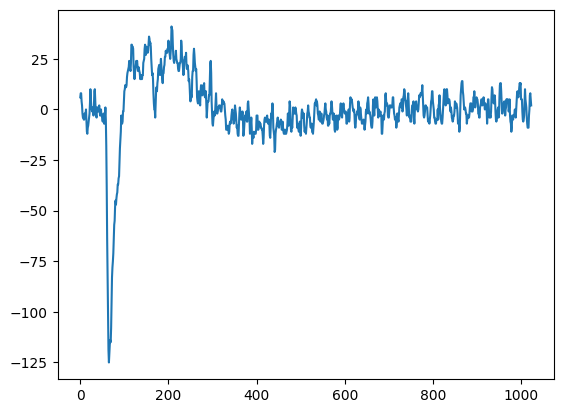

In [64]:
plt.plot(hits[11]['adcs'] - hits[11]['baseline'])
#plt.hlines(hits[11]['baseline'], xmin=0, xmax=1000, color='r')